## Lending 

## How Lending Club Works?
<img src="http://echeck.org/wp-content/uploads/2016/12/Showing-how-the-lending-club-works-and-makes-money-1.png"><br><br>

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stats 
import sklearn
import random
import re
import datetime
import sys,os
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier      
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100) 
np.random.seed(1)
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# 1.- LOAD DATA FROM .CSV FILE

In [3]:
data = pd.read_csv(data_path, parse_dates=['issue_d'], low_memory=False)
print ('This dataset has {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))
data.head(2)

This dataset has 887379 rows and 74 columns


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1.- Data preprocessing

#####  Let´s see if there are variables with more than 80% not informed

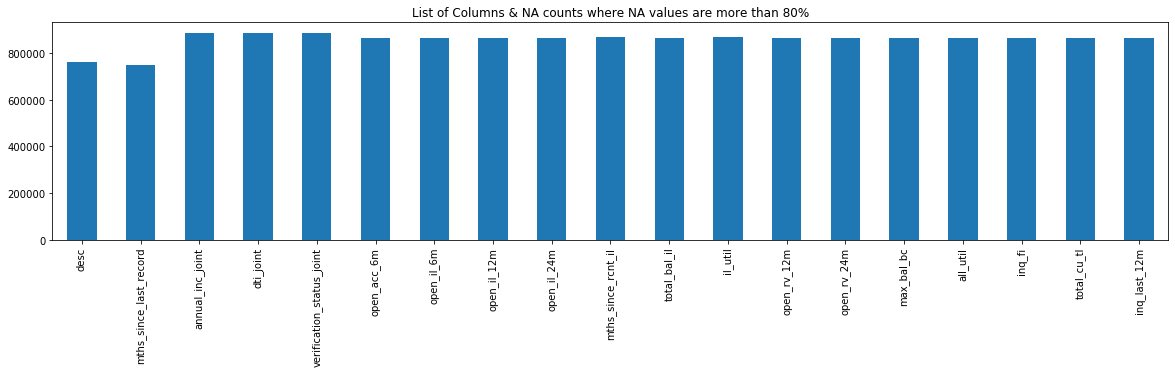

There are 19 variables with more than 80% of empty values


In [6]:
missing = data.isnull().sum()
missing = missing[missing.values >(0.8*len(data))]
plt.figure(figsize=(20,4))
missing.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 80%')
plt.show();
print('There are {} variables with more than 80% of empty values'.format(missing.shape[0])) 

##### As we can see these variables are very poorly informed, I will remove those columns  as it is not feasable to impute missing values for those columns.

In [7]:
for i in list(missing.index):
    data.drop(i,1,inplace=True)
print ('This dataset has now {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))

This dataset has now 887379 rows and 55 columns


##### Now let´s check if there are any variable with unique values

In [8]:
unique_list= []
for i in data:
    if len(list(data[i].unique()))==1:
        data.drop(i,1,inplace=True)
        unique_list.append(i)

# There are also two other variables with more than 99.999% filled with the same value, we will delete those too.
almost_unique = ['pymnt_plan', 'application_type']
data.drop(almost_unique, axis=1, inplace=True)

print ('The following variables have been dropped because they have a single value: ',unique_list + almost_unique)
print ('This dataset has now {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))

The following variables have been dropped because they have a single value:  ['policy_code', 'pymnt_plan', 'application_type']
This dataset has now 887379 rows and 52 columns


#### Previously I have removed columns based on missing and unique values. Now it´s time for a business perspective analysis and for that purpose identifier variables such as 'id´s' are irrelevant. Let´s delete them.

In [9]:
irrelevant_columns = ['id', 'member_id', 'url', 'zip_code', 'title']
data.drop(labels = irrelevant_columns, axis =1, inplace=True)
print ('This dataset has now {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))

This dataset has now 887379 rows and 47 columns


# 2.- EXPLORATORY ANALYSIS
##### In this stage I will explore in greater depth the data to have a better understanding of the business. We will use pandas library to find the business insights.

### Analyze Loan amount and Interest rates
   - Frequency distribution of loan amount.
   - Boxplot and violin plot of loan amount.
   - Frequency distribution of interest rates. 
   - Boxplot and violin plot of interest rates.
   
More information about normal distribution --> https://en.wikipedia.org/wiki/Normal_distribution
   
More information about boxplot -->    https://en.wikipedia.org/wiki/Box_plot

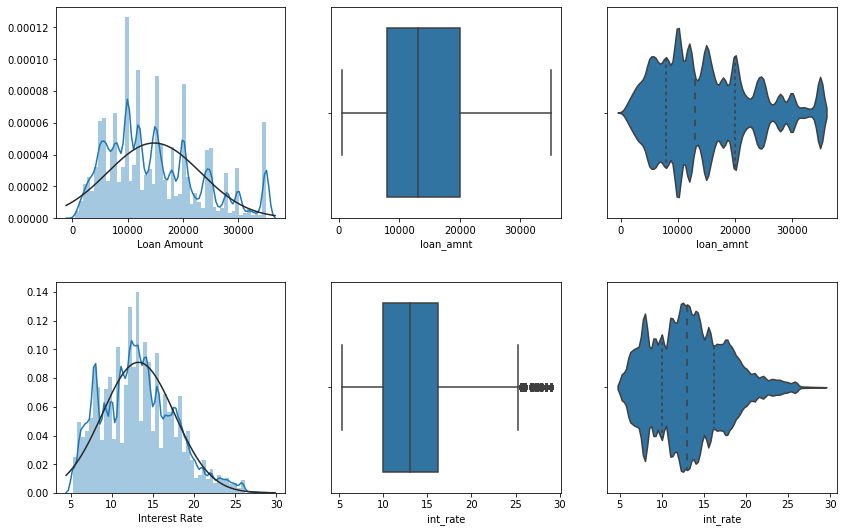

In [10]:
tmp = data[["loan_amnt", "int_rate"]].fillna(0)

fig, ax =plt.subplots(2,3, figsize=(14,10))
plt.subplots_adjust(hspace = 0.3, top = 0.8)

# Loan amount distribution plots
sns.distplot(tmp.loan_amnt, fit=stats.norm, axlabel="Loan Amount",
             label="Loan Amount Frequency distribution", ax=ax[0][0])
sns.boxplot(x=tmp.loan_amnt, ax=ax[0][1])
sns.violinplot(x="loan_amnt", data=data, inner="quartile", ax=ax[0][2])

# Interest rates distribution plots
sns.distplot(tmp.int_rate, fit=stats.norm, axlabel="Interest Rate",
             label="Interest Frequency distribution", ax=ax[1][0])
sns.boxplot(x=tmp.int_rate, ax=ax[1][1])
sns.violinplot(x="int_rate", data=data, inner="quartile", ax=ax[1][2])
fig.show()
plt.tight_layout;

#### As a result  of this analysis, it can be inferred that most of the loans were in the range of 10000 and 15000 usd with a 13% interest rate.

### Analyze loans by its purpose
- Number of loans by the most common purposes
- Loan amount with its distribution pattern by purpose; hues by its term
- Interest rate with its distribution pattern by purpose; hues by its term

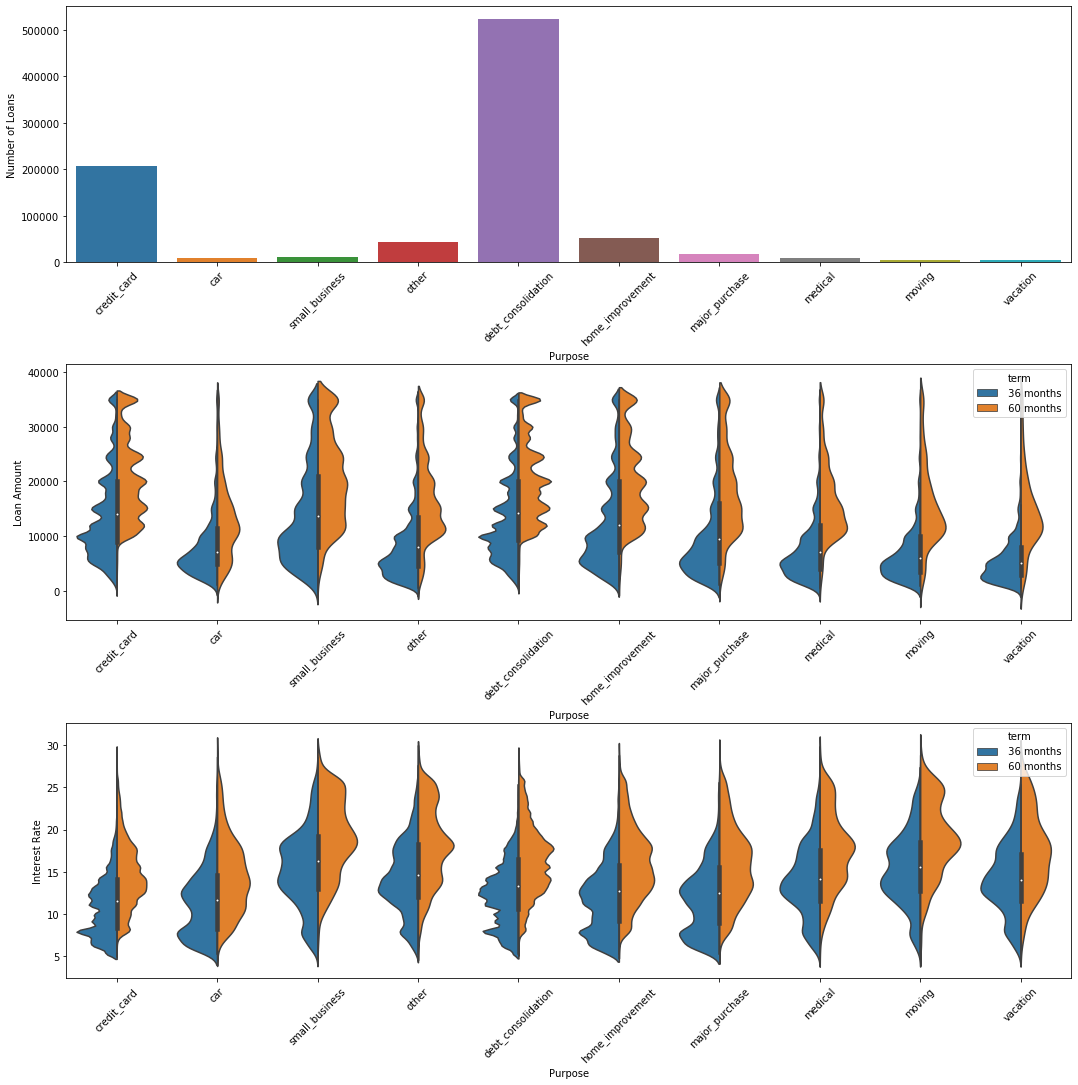

In [11]:
tmpdata = data[["purpose", "int_rate", "loan_amnt", "term"]]
tmpdata = tmpdata[(tmpdata.purpose).isin(list(tmpdata['purpose'].value_counts().iloc[:10].index))]

fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

s0 = sns.countplot(x="purpose",data=tmpdata,ax=ax[0])
s0.set(xlabel='Purpose',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="purpose",y="loan_amnt",data=tmpdata, ax=ax[1], hue="term", split=True)
s1.set(xlabel='Purpose',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="purpose",y="int_rate",data=tmpdata, ax=ax[2], hue="term", split=True)
s2.set(xlabel='Purpose',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)

plt.show();

#### As it can be seen, the three main reasons to ask for a loan are debt consolidation, home improvements and credit cards. Also that  small businesses have higher interest rates and loan amounts. 

### Analyze  Loans issued and Interest rates over time
- Number of loan's growth over time
- Total loan book value growth over time
- Customers loan requirements over time (Median loan amount)
- Median interest rates over time

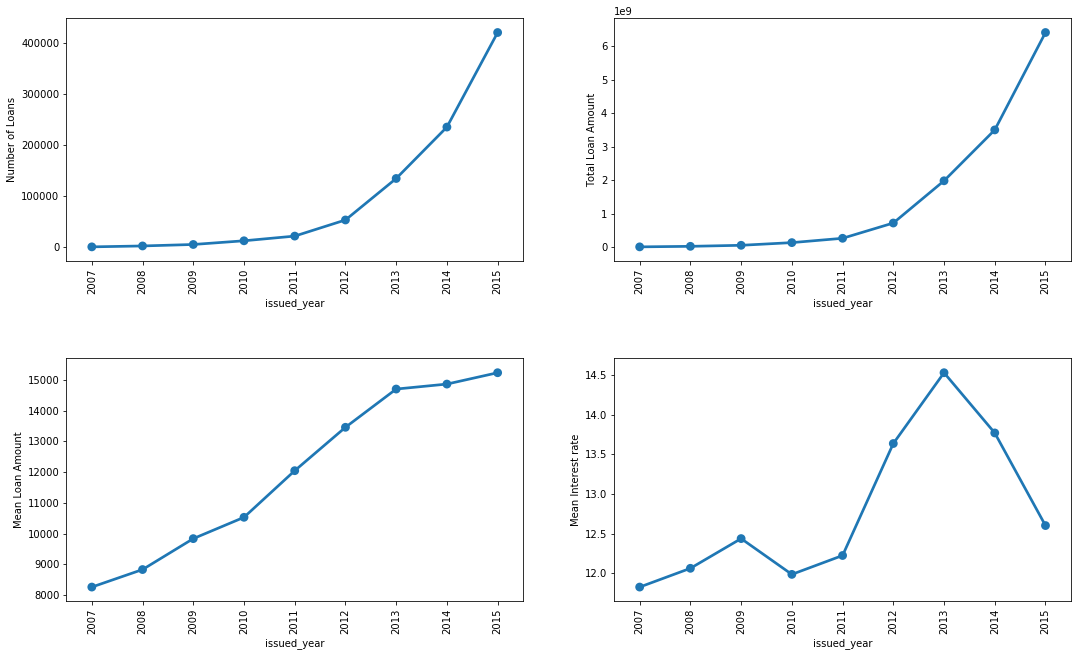

In [12]:
# Lets' transform the issue dates by year.
data['issued_year'] = pd.to_datetime(data['issue_d']).dt.year
data.drop('issue_d', axis=1, inplace = True)

# Number of loan over year
loansOverTime = data.groupby("issued_year", sort= True).count()[['loan_amnt']]
loansOverTime.columns = ["Number of Loans"]

fig, ax =plt.subplots(2,2, figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

s0=sns.pointplot(x=loansOverTime.index, y=loansOverTime["Number of Loans"], ax=ax[0][0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=90)

# loan Amount over year
totalloansOverTime = data.groupby("issued_year", sort= True).sum()[['loan_amnt']]
totalloansOverTime.columns = ["Total Loan Amount"]

s1 = sns.pointplot(x=totalloansOverTime.index, y=totalloansOverTime["Total Loan Amount"], capsize=.2, ax=ax[0][1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

# Median Loan Amount, grouped by issue year
meanloanAmtOverTime = data.groupby("issued_year", sort= True).mean()[['loan_amnt']]
meanloanAmtOverTime.columns = ["Mean Loan Amount"]

s2 = sns.pointplot(x=meanloanAmtOverTime.index, y=meanloanAmtOverTime["Mean Loan Amount"], capsize=.2, ax=ax[1][0])
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)

# Mean Interest rate, grouped by issue year 
meanIntrateOverTime = data.groupby("issued_year", sort= True).mean()[['int_rate']]
meanIntrateOverTime.columns = ["Mean Interest rate"]

s3 = sns.pointplot(x=meanIntrateOverTime.index, y=meanIntrateOverTime["Mean Interest rate"], capsize=.2, ax=ax[1][1])
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)

fig.show();

#### The number of issued loan was steady during the 2007-2011 period but has rocked from 2012. This trend is reflected also in the total loan amount asked. It is also worth noting that the average interest rates have declined since 2013, what might explain the increase in the volume of loans.

### Analyze Loans over loan status.
- Number of loans over the most common loan status
- Distribution of total accounts for each status
- Distribution of loan amount with the probability density for each loan value over loan status

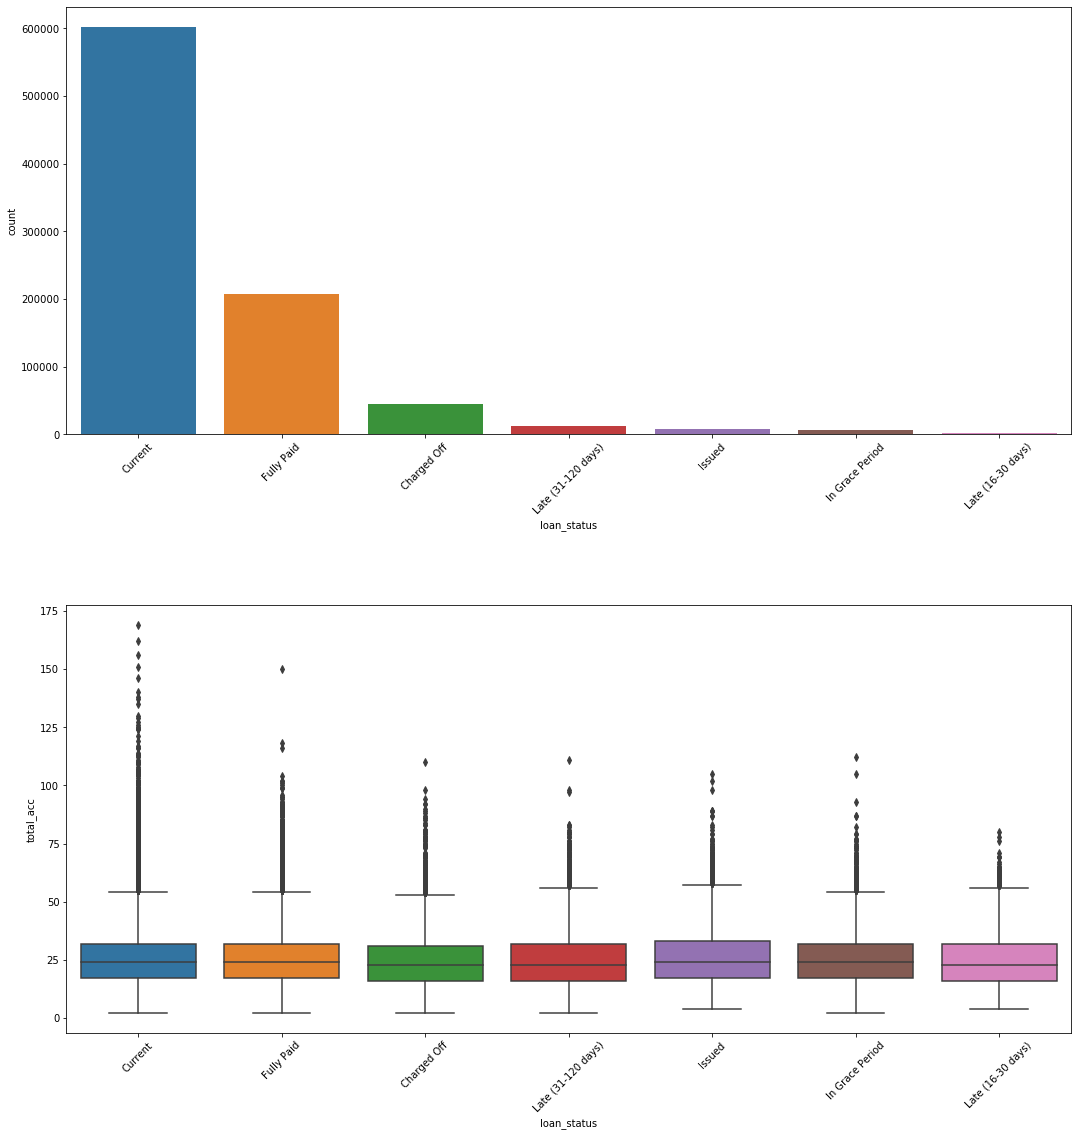

In [13]:
tmp = data[["loan_status", "total_acc", "loan_amnt"]]
tmp = tmp[tmp.total_acc <= 200]

fig, ax =plt.subplots(2,1,figsize=(18,30))
plt.subplots_adjust(hspace = 0.4, top = 0.6)

s0 = sns.countplot(x="loan_status", data=tmp, ax=ax[0], order=tmp.loan_status.value_counts().iloc[:7].index)
s0.set_xticklabels(s0.get_xticklabels(), rotation=45)

s1 = sns.boxplot(x="loan_status", y="total_acc", data=tmp, ax=ax[1],  order=tmp.loan_status.value_counts().iloc[:7].index)
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)

plt.show();

#### In this chart, we can see the volume of loans that remain in force in relation to the rest of status

### Analyze the total loan amount by income range, interest rate and loan status

##### Let´s see if there a relation between the annual income and the loan status

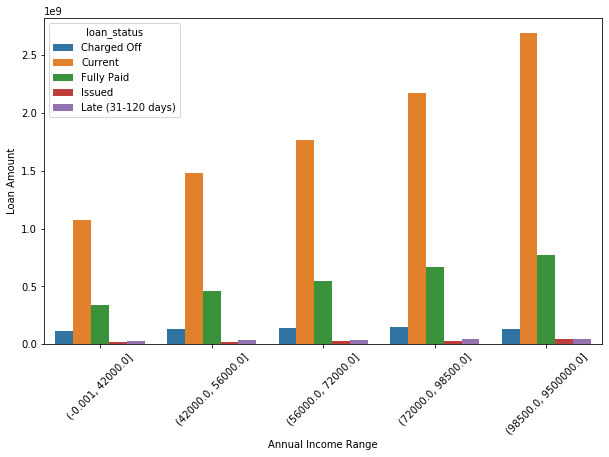

In [14]:
tmpdata = data[["annual_inc", "loan_amnt", "loan_status"]]

# Quantile-based discretization function.
tmpdata['annual_inc_range'] = pd.qcut(tmpdata["annual_inc"], 5)

data_plot = tmpdata[["annual_inc_range", "loan_amnt", "loan_status"]]
data_plot = data_plot[(data_plot.loan_status).isin(list(data_plot['loan_status'].value_counts().iloc[:5].index))]
data_plot = data_plot.groupby(["annual_inc_range", "loan_status"], sort= True).sum().reset_index()

fig, ax =plt.subplots(1,1,figsize=(10,6))
s0 = sns.barplot(x="annual_inc_range", y="loan_amnt", hue="loan_status", data=data_plot)
s0.set(xlabel='Annual Income Range',ylabel='Loan Amount')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)
plt.show();

#### There is a clear relation between anual income and loan status, the higher the income the greater in loans volume.

##### Let´s see if there a relation between interest rates and loan amount

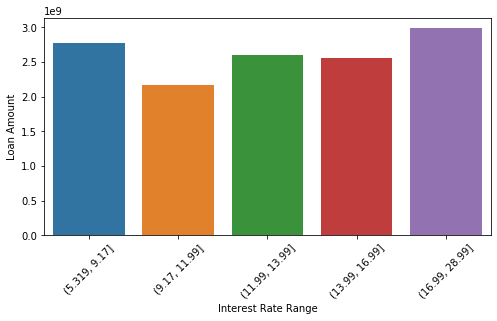

In [15]:
tmpdata = data[["int_rate", "loan_amnt"]]

# Quantile-based discretization function.
tmpdata['int_rate_range'] = pd.qcut(tmpdata["int_rate"], 5)

data_plot = tmpdata.groupby("int_rate_range", sort= True).sum()[['loan_amnt']].reset_index()

fig, ax =plt.subplots(1,1,figsize=(8,4))

s1 = sns.barplot(x="int_rate_range", y="loan_amnt", data=data_plot)
s1.set(xlabel='Interest Rate Range',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

plt.show();

#### Acoording to the provided data, greater loan amounts does not strictly correlate with higher interest rates

### Analyze total loan amount distribution in the US states

In [16]:
totalloansByState = data.groupby("addr_state").sum()[['loan_amnt']].reset_index()
totalloansByState.columns = ["US-State", "Total Loan Amount"]

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
       [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_ = dict(
        type='choropleth',
        colorscale = scl,
        #autocolorscale = False,
        locations = totalloansByState['US-State'],
        z = totalloansByState['Total Loan Amount'].astype(float),
        locationmode = 'USA-states',
        text = totalloansByState['US-State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        ),
        #colorscale = 'Viridis', 
        reversescale = True
    )

layout = dict(
        title = 'Total Loan Amount by US States',
        geo = dict(
            projection=dict( type='albers usa' ),
            showframe=False
        ),
    )

choromap = go.Figure(data = [data_], layout = layout)
iplot(choromap, validate=False, image = 'png', filename='StateMapLoanAmount')

#### As it can be seen, California and Texas together with Florida and NewYork are s states with higher loan amounts

### Analyze good and bad loans
- Amount of bad loans Lending Club has declared so far
- Amount of bad loans over the years

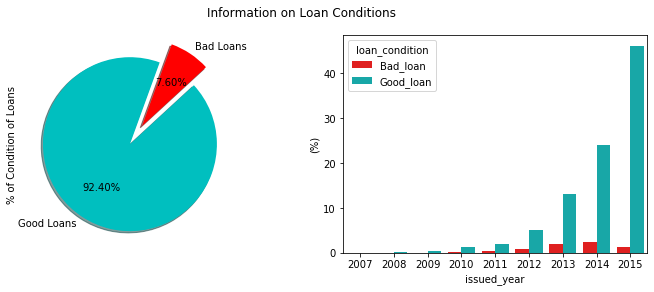

In [17]:
bad_status = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off",
             "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
data['loan_condition'] = data['loan_status'].map(lambda x: 'Bad_loan' if x in bad_status else 'Good_loan')

f, ax = plt.subplots(1,2, figsize=(12,4))
labels ="Good Loans", "Bad Loans"
plt.suptitle('Information on Loan Conditions', fontsize=12)
data["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=['c','r'], 
                                             labels=labels, fontsize=10, startangle=70)
ax[0].set_ylabel('% of Condition of Loans', fontsize=10)

data_loan_conditions = data.groupby(["issued_year","loan_condition"],
                                    sort= True).agg({'loan_amnt': lambda x: len(x) / float(len(data)) * 100})[['loan_amnt']].reset_index()
sns.barplot(x="issued_year", y="loan_amnt", hue="loan_condition", data=data_loan_conditions, palette=['r','c'])
ax[1].set(ylabel="(%)");

#### Here it can be seen that bad loans accounts for 7.6% of the total but be aware that there is a huge volume of current loans that still have the risk of becoming bad loans. 

# Now it´s time for  discover new insights whitin the data, some possibilities are: 

- Analyze borrowers by employment rate and employment lenght. What profession asks for more loans?
- Analyze loan´s grade by loan amount and interest rate. Is there any clear trend?
- Analyze the relation between interest rates and good or bad loans. 





### 1. Analyze borrowers by employment rate and employment lenght. What profession asks for more loans?

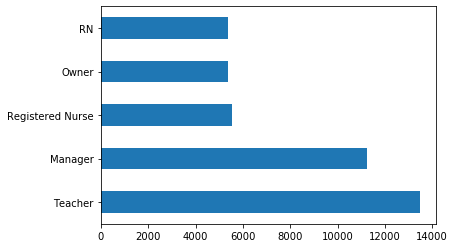

In [27]:
data['emp_title'].value_counts()[:5].plot.barh()

The profession that asks for more loans is the teachers, followed by the managers.

This graph alone is not relevant to the lender, unless it is compared by filtering or eliminating those credits that are good pay.

As for the loans that are bad pay, there if we are interested in knowing who is the one who most asks for loans to eliminate that profession and not give loans.

Since there is possibly a tendency of that profession not to pay.

Or to be placed in circumstances of greater economic vulnerability and that is why they do not pay, that would be the interesting fact

### 2.Analyze loan´s grade by loan amount and interest rate. Is there any clear trend?

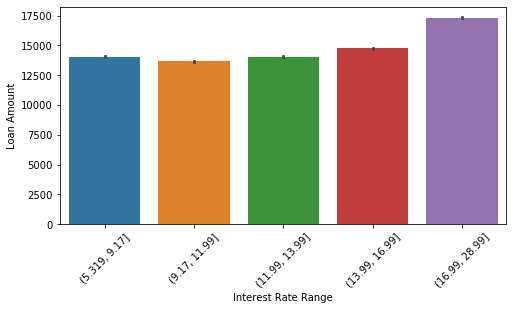

In [35]:
tmpdata = data[["int_rate", "loan_amnt",'grade']]

# Quantile-based discretization function.
tmpdata['int_rate_range'] = pd.qcut(tmpdata["int_rate"], 5)

data_plot = tmpdata.groupby("int_rate_range", sort= True).sum()[['loan_amnt']].reset_index()

fig, ax =plt.subplots(1,1,figsize=(8,4))

s1 = sns.barplot(x="int_rate_range", y="loan_amnt", data=tmpdata)
s1.set(xlabel='Interest Rate Range',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

plt.show();

**Filtering by bad_loan**

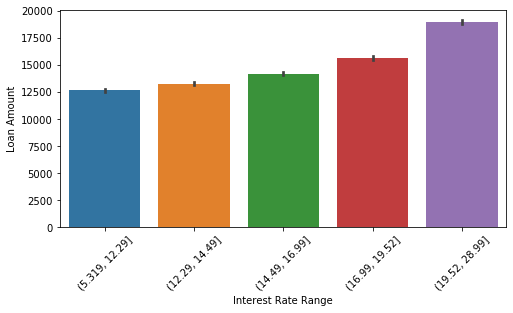

In [63]:
tmpdata = data[["int_rate", "loan_amnt",'grade','loan_condition']]

# Quantile-based discretization function.
tmpdata = tmpdata[tmpdata['loan_condition']=='Bad_loan']
tmpdata['int_rate_range'] = pd.qcut(tmpdata["int_rate"], 5)

data_plot = data_plot.groupby("int_rate_range", sort= True).sum()[['loan_amnt']].reset_index()

fig, ax =plt.subplots(1,1,figsize=(8,4))

s1 = sns.barplot(x="int_rate_range", y="loan_amnt", data=tmpdata)
s1.set(xlabel='Interest Rate Range',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

plt.show();

Chart 2.1 and 2.2 indicate a clear trend that says the greater the amount, the higher the rate.

2.1 includes all borrowers.

And 2.2 includes only those who were poorly paid.

But as you can see good or bad pay the interest rate goes up when the amount is higher.

This can also be explained because the number of credit providers is lower, and at a lower offer the price rises, according to the principles of the economy

### 3.Analyze the relation between interest rates and good or bad loans.

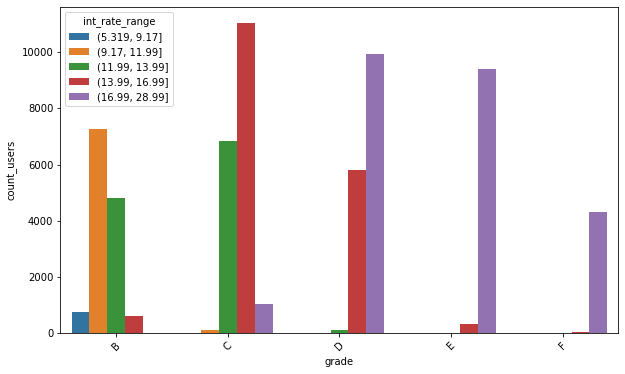

In [54]:
tmpdata = data[["int_rate", "loan_amnt",'grade','loan_condition']]

# Quantile-based discretization function.
data['int_rate_range'] = pd.qcut(data["int_rate"], 5)

data_plot = data[data['loan_condition']=='Bad_loan']
data_plot = data_plot[["int_rate_range", "loan_amnt", "grade"]]
data_plot = data_plot[(data_plot.grade).isin(list(data_plot['grade'].value_counts().iloc[:5].index))]
data_plot = data_plot.groupby(["int_rate_range", "grade"], sort= True).int_rate_range.agg('count').to_frame('count_users').reset_index()

fig, ax =plt.subplots(1,1,figsize=(10,6))
s0 = sns.barplot(x="grade", y="count_users", hue="int_rate_range", data=data_plot)
s0.set(xlabel='grade',ylabel='count_users')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)
plt.show();


Chart number three indicates that the categories D E F, which were already rated according to the estimated risk of them, were indeed bad pay.

Since this graph was made taking into account only the people who were poorly paid, and we observe that not only those who were rated as effective, that is to say the highest risk, were the only ones who stopped paying, we even observed that there were a high number of people who had a B rating, and who also did not pay is the yellow line.

We observe that the two high risk factors when combined end up in default, that is to say we see three large columns to the right of purple color that is to say they had high interest rate, and it was combined with that they were also classified as high risk DEF, Y They finally ended up not paying.

Calls to attention that people with a C rating, which is not considered as high risk, will stop paying, despite the average interest rate (from 11.99 to 13.99)

So we see utility in having an algorithm that predicts if the person we are analyzing is going to be good pay or bad.

But there is also benefit in knowing the business rules, which arise from analyzing these latest graphs and variables and which we have just commented.

# 3.- Featuring Engineering

### Data Cleaning & Missing Data Imputation

In [19]:
# First we make a copy of the dataset
data_model = data.copy()

In [20]:
data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
887374        Current
887375        Current
887376        Current
887377        Current
887378        Current
Name: loan_status, Length: 887379, dtype: object

#### In order to fit a model to our data it is necessary to convert categorical variables into numerical.

In [21]:
categorical_variables = []
for i in data_model.columns:
    if data_model[i].dtype == 'object':
        categorical_variables.append(i)
        
print('Categorical variables:')
pd.DataFrame(zip(categorical_variables, [str(data_model[x].value_counts().index[0:2].values.tolist()) for x in categorical_variables], [len(data_model[x].value_counts()) for x in categorical_variables]),
             columns= ['Variable', 'Example', 'Number of levels'])

Categorical variables:


,Variable,Example,Number of levels
0,term,"[' 36 months', ' 60 months']",2
1,grade,"['B', 'C']",7
2,sub_grade,"['B3', 'B4']",35
3,emp_title,"['Teacher', 'Manager']",299271
4,emp_length,"['10+ years', '2 years']",11
5,home_ownership,"['MORTGAGE', 'RENT']",6
6,verification_status,"['Source Verified', 'Verified']",3
7,loan_status,"['Current', 'Fully Paid']",10
8,purpose,"['debt_consolidation', 'credit_card']",14
9,addr_state,"['CA', 'NY']",51


In [22]:
# Distribution of missing values in categorical variables
data_model[categorical_variables].isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_title               51462
emp_length              44825
home_ownership              0
verification_status         0
loan_status                 0
purpose                     0
addr_state                  0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d            17659
next_pymnt_d           252971
last_credit_pull_d         53
loan_condition              0
dtype: int64

In [23]:
data_model['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
887374     36 months
887375     36 months
887376     60 months
887377     60 months
887378     36 months
Name: term, Length: 887379, dtype: object

In [24]:
# term Variable --> we extract the number of months
data_model['term'] = data_model.term.str.extract('(\d+)').astype(int)

# emp_title, sub_grade, addr_state have to many levels we´ll remove it
data_model.drop(['emp_title','addr_state', 'sub_grade'], axis=1, inplace= True)

# ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'] variables -->dummies
dummies_variables = ['grade', 'emp_length', 'home_ownership', 'purpose', 'initial_list_status', 'verification_status']
dummy_data_model = pd.get_dummies(data_model[dummies_variables], prefix_sep='_', drop_first=True)
data_model = pd.concat([data_model, dummy_data_model], axis=1)
data_model.drop(dummies_variables, axis=1, inplace= True)
del dummy_data_model

# We won´t work with dates so we remove 'earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d'
data_model.drop(['earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d'], axis=1, inplace= True)

# loan_condition is our target to predict, we convert it to binnary in a new variable called target
data_model['target'] = data_model['loan_condition'].map(lambda x: 1 if x=='Bad_loan' else 0)


print ('After processing categorical variables this dataset has {0} rows and {1} columns'.format(data_model.shape[0], data_model.shape[1]))

After processing categorical variables this dataset has 887379 rows and 73 columns


#### Now we need to transform our loan_condition feature to a binary target in order to be able to predict with a scikit learn built-in algorithm

In [25]:
# loan_condition is our target to predict, we convert it to binnary in a new variable called target
data_model['target'] = data_model['loan_condition'].map(lambda x: 1 if x=='Bad_loan' else 0)

data_model.target.value_counts()

0    819950
1     67429
Name: target, dtype: int64

#### We have 67429 loans classified as bad loans

#### Once all variables are converted, we need to remove all fields which are related to the current loan to avoid leaking information

In [26]:
# loan_status and loan_condition need to be removed since are part of the target
data_model.drop(['loan_status', 'loan_condition'], axis=1, inplace= True)

# Directly related fiels to drop
cols = ["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
 "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med",
 "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]

data_model.drop(cols, axis=1, inplace= True)

In [27]:
# we impute 0 to all missing values 
data_model.fillna(0, inplace=True)

# MODELLING

#### Now it´s time to build a statistical model using machine learning algorithms. The model will use the historic loan data to learn and identify loans/borrowers which are likely to default.

#### In order to avoid overfitting or at least minimize it we usually fit the model on a training set and predict on a data that wasn’t trained before. Overfitting occur when we’ve fit the model too much to the training subset so it is not capable to generalize the same patterns in the test set. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be accurate on the training set but it won´t be able to infer on the test set.

#### The opposite to overfitting is underfitting and it means that the model does not fit the training set and therefore misses the patterns in the data. This is the result of fitting a simple model into complex data.


#### The goal is to find the middle ground between under and overfitting our model. To do so, the first step is to split the data into two subsets: training data and testing_data, so we can evaluate the statistical model over a indepentent dataset.

In [28]:
data_model_variables = list(data_model.columns)
data_model_variables.remove('target')
X = data_model[data_model_variables]
y = data_model['target']

# We will leave a 30% of the dataset to test our model
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [29]:
X_train.shape, X_test.shape

((621165, 55), (266214, 55))

#### At this point, our preprocessed dataset has 54 features, let´s feature selection techniques to find the 20 most important variables to predict bad loans. To do so, we will use scikit learn libraries. https://scikit-learn.org/stable/modules/feature_selection.html

In [30]:
most_relevant = SelectKBest(chi2, k=10).fit(X_train, y_train)
most_relevant_df = pd.DataFrame(zip(X_train.columns, most_relevant.scores_), columns= ['Variables', 'score']).sort_values( 'score', ascending=False).head(20)
most_relevant_variables = most_relevant_df.Variables.tolist()

most_relevant_df

,Variables,score
6,annual_inc,4.143897e+07
13,revol_bal,7.177252e+06
0,loan_amnt,4.755455e+04
1,funded_amnt,3.251804e+04
4,int_rate,2.776753e+04
5,installment,1.789284e+04
14,revol_util,1.681788e+04
16,mths_since_last_major_derog,9.022993e+03
9,inq_last_6mths,5.687963e+03
22,grade_F,2.845534e+03


#### Now that I have found the most relevant variables let´s use scikit´s learn classification models to fit it. Here is a tip of which algorithm can be used depending on your date and prediction problem


<img src="https://i.stack.imgur.com/IMVOl.png"><br><br>

## Logistic Regression Classifier 

#### First I will fit a logistic regression model, you can read more information here:
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Logit roc_auc_score metric: 0.651224020064


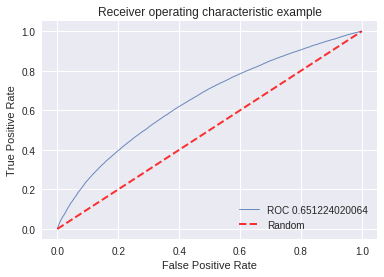

In [34]:
# Train model with Training Data
lr_classifier = LogisticRegression(penalty='l1', random_state=42, max_iter=10)
lr_classifier.fit(X_train[most_relevant_variables], y_train)

# Test model with Test Data
y_predicted = lr_classifier.predict_proba(X_test[most_relevant_variables])[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_test, y_predicted.round(4))
print('Logit roc_auc_score metric: {}'.format(roc_auc))
                        
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=1)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC {}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();             

In [35]:
### Let´s see the coeficients
logit_coef = pd.DataFrame(zip(X_train.columns, lr_classifier.coef_[0]), columns= ['Variables', 'Coefficients']).sort_values( 'Coefficients', ascending=False)
logit_coef

,Variables,Coefficients
15,total_acc,2.206182
9,inq_last_6mths,1.811310
11,open_acc,1.320375
14,revol_util,0.885597
19,grade_C,0.210400
8,delinq_2yrs,0.182836
6,annual_inc,0.005021
5,installment,0.000316
2,funded_amnt_inv,0.000002
3,term,-0.000002


## Random Forest Classifier
#### Now I will use a random forest to analyze if a tree based algorithm can improve the logit.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random Forest roc_auc_score metric: 0.70157346431


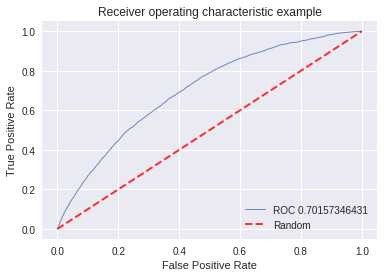

In [36]:
# Train model with training set
rf_classifier = RandomForestClassifier(max_depth = 3, random_state = 42)
rf_classifier.fit(X_train[most_relevant_variables], y_train)

# Test model with test Data
y_predicted = rf_classifier.predict_proba(X_test[most_relevant_variables])[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_test, y_predicted.round(4))
print('Random Forest roc_auc_score metric: {}'.format(roc_auc))
                        
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=1)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC {}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();                 

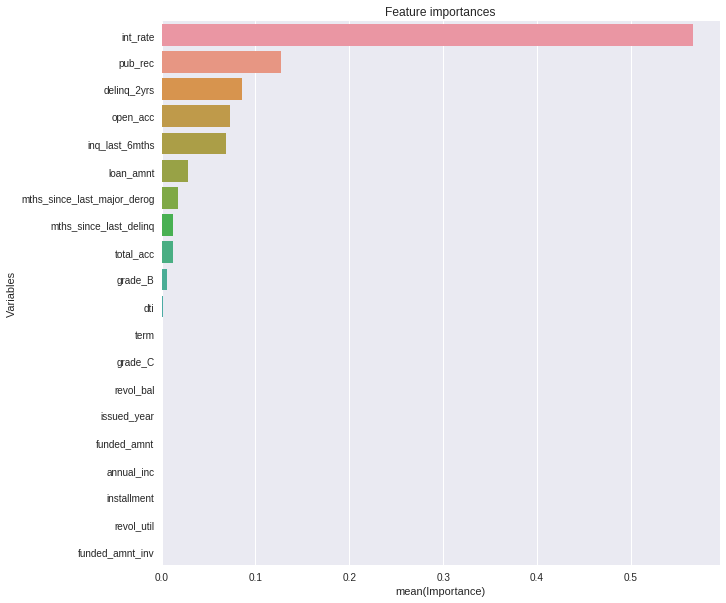

In [37]:
### Plot the feature importances of the forest
rf_importances = pd.DataFrame(zip(X_train.columns, rf_classifier.feature_importances_), columns= ['Variables', 'Importance']).sort_values( 'Importance', ascending=False)
plt.figure(figsize=(10,10))
plt.title("Feature importances")
ax = sns.barplot(x="Importance", y="Variables", data=rf_importances)
plt.show()

## Decision Tree Classifier
#### Now I will use a Decision Tree Classifier to analyze if a tree based algorithm can improve the logit.

Random Forest roc_auc_score metric: 0.6956403376714387


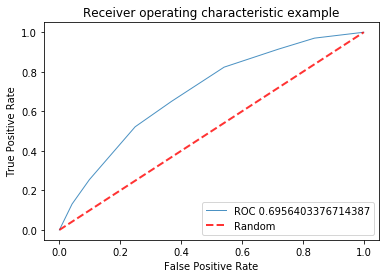

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Train model with training set
rf_classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
rf_classifier.fit(X_train[most_relevant_variables], y_train)

# Test model with test Data
y_predicted = rf_classifier.predict_proba(X_test[most_relevant_variables])[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_test, y_predicted.round(4))
print('Random Forest roc_auc_score metric: {}'.format(roc_auc))
                        
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=1)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC {}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();                 


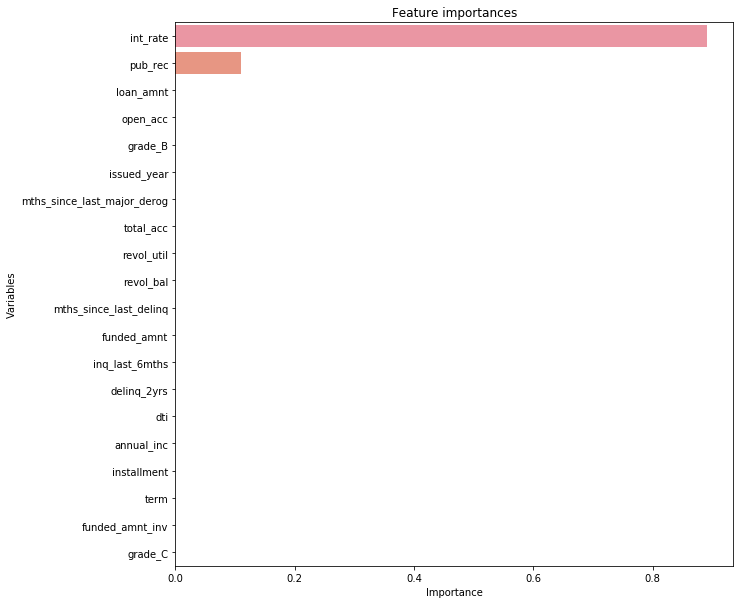

In [40]:
### Plot the feature importances of the forest
rf_importances = pd.DataFrame(zip(X_train.columns, rf_classifier.feature_importances_), columns= ['Variables', 'Importance']).sort_values( 'Importance', ascending=False)
plt.figure(figsize=(10,10))
plt.title("Feature importances")
ax = sns.barplot(x="Importance", y="Variables", data=rf_importances)
plt.show()

## BaggingClassifier
#### Now I will use a ExtraTreeClassifier to analyze if a tree based algorithm can improve the logit.

Logit roc_auc_score metric: 0.6302505779523884


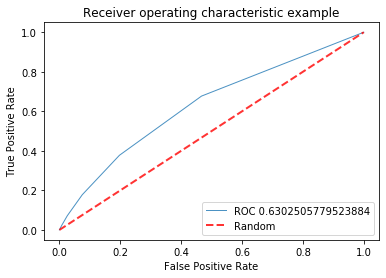

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

# Train model with Training Data
lr_classifier = BaggingClassifier(base_estimator=ExtraTreeClassifier())
lr_classifier.fit(X_train[most_relevant_variables], y_train)

# Test model with Test Data
y_predicted = lr_classifier.predict_proba(X_test[most_relevant_variables])[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_test, y_predicted.round(4))
print('Logit roc_auc_score metric: {}'.format(roc_auc))
                        
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=1)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC {}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();


## xgboost
#### Now I will use a XGB Classifier to analyze if a tree based algorithm can improve the logit.

Logit roc_auc_score metric: 0.7485447049298822


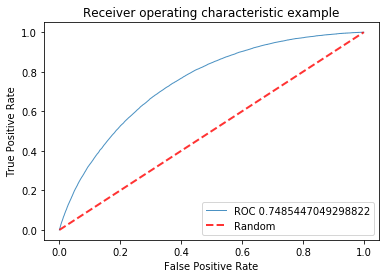

In [37]:
from xgboost import XGBClassifier

# Train model with Training Data
lr_classifier = XGBClassifier(n_jobs=3, max_depth=10 )
lr_classifier.fit(X_train[most_relevant_variables], y_train)

# Test model with Test Data
y_predicted = lr_classifier.predict_proba(X_test[most_relevant_variables])[:, 1]

# Evaluate model
roc_auc = roc_auc_score(y_test, y_predicted.round(4))
print('Logit roc_auc_score metric: {}'.format(roc_auc))
                        
fpr, tpr, thresholds = roc_curve(y_test, y_predicted, pos_label=1)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC {}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();

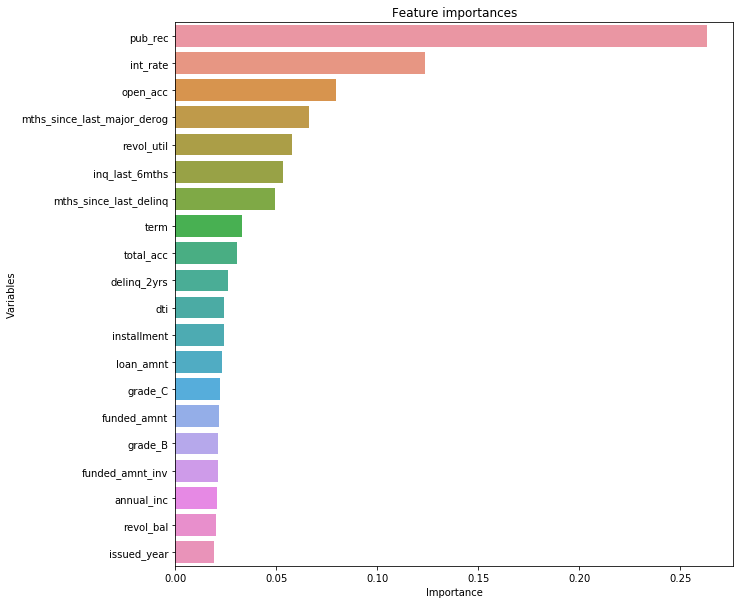

In [38]:
### Plot the feature importances of the forest
rf_importances = pd.DataFrame(zip(X_train.columns, lr_classifier.feature_importances_), columns= ['Variables', 'Importance']).sort_values( 'Importance', ascending=False)
plt.figure(figsize=(10,10))
plt.title("Feature importances")
ax = sns.barplot(x="Importance", y="Variables", data=rf_importances)
plt.show()

**What algorithm gave the best results?**


The contingency table can provide several evaluation measures (see terminology box). To draw an ROC curve, only the Positive True (VPR) and False Positive (FPR) ratios are necessary. The VPR measures the extent to which a classifier or diagnostic test is able to detect or classify positive cases correctly, among all the positive cases available during the test. The RPF defines how many positive results are incorrect among all the negative cases available during the test.

The best possible method of prediction would be located at a point in the upper left corner, or coordinate (0.1) of the ROC space, representing 100% sensitivity (no false negatives) and 100% also specificity (no false positives). ). This point (0,1) is also called a perfect classification. On the contrary, a totally random classification (or random divination) would give a point along the diagonal line, which is also called a non-discrimination line, from the lower left end to the upper right corner (regardless of the types of positive and negative basis). A typical example of random divination would be to decide from the results of throwing a coin in the air, as the sample size increases, the point of a random ROC classifier will shift to the position (0.5, 0.5).

As described in the previous paragraph, the algorithm that best classifies in this case is Xgboos classifier with an area under the curve of 0.74